## Part 2: Predictions

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   Name                      2000 non-null   object 
 2   Age                       2000 non-null   int64  
 3   Nationality               2000 non-null   object 
 4   Overall                   2000 non-null   int64  
 5   Club                      1969 non-null   object 
 6   Value                     2000 non-null   object 
 7   Wage                      2000 non-null   object 
 8   Preferred Foot            1997 non-null   object 
 9   International Reputation  1997 non-null   float64
 10  Weak Foot                 1997 non-null   float64
 11  Skill Moves               1997 non-null   float64
 12  Work Rate                 1997 non-null   object 
 13  Body Type                 1997 non-null   object 
 14  Position

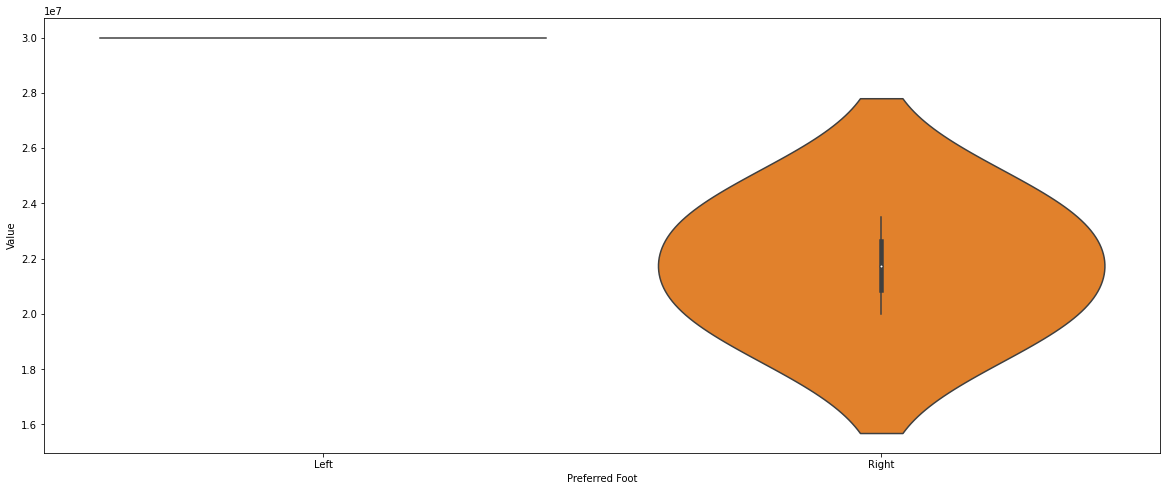

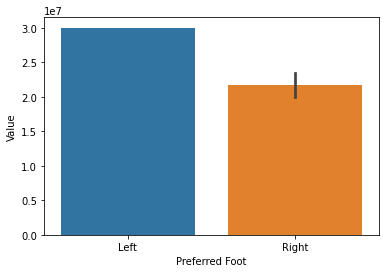

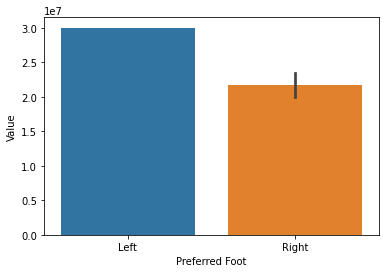

No. right-footed players: 2
No. left-footed players: 1
['Left', 'Right']
Categories (2, object): ['Left', 'Right']
['Lean', 'Normal']
Categories (2, object): ['Lean', 'Normal']
['ST']
Categories (1, object): ['ST']


/home/marcus/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  Returns
/home/marcus/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  # Compute sum of squared deviations from mean
/home/marcus/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/marcus/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


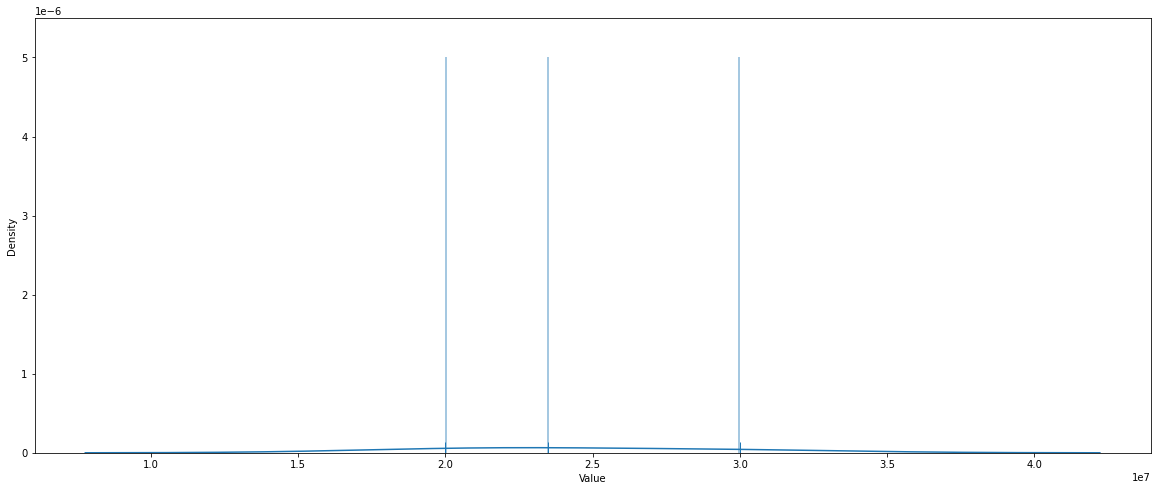

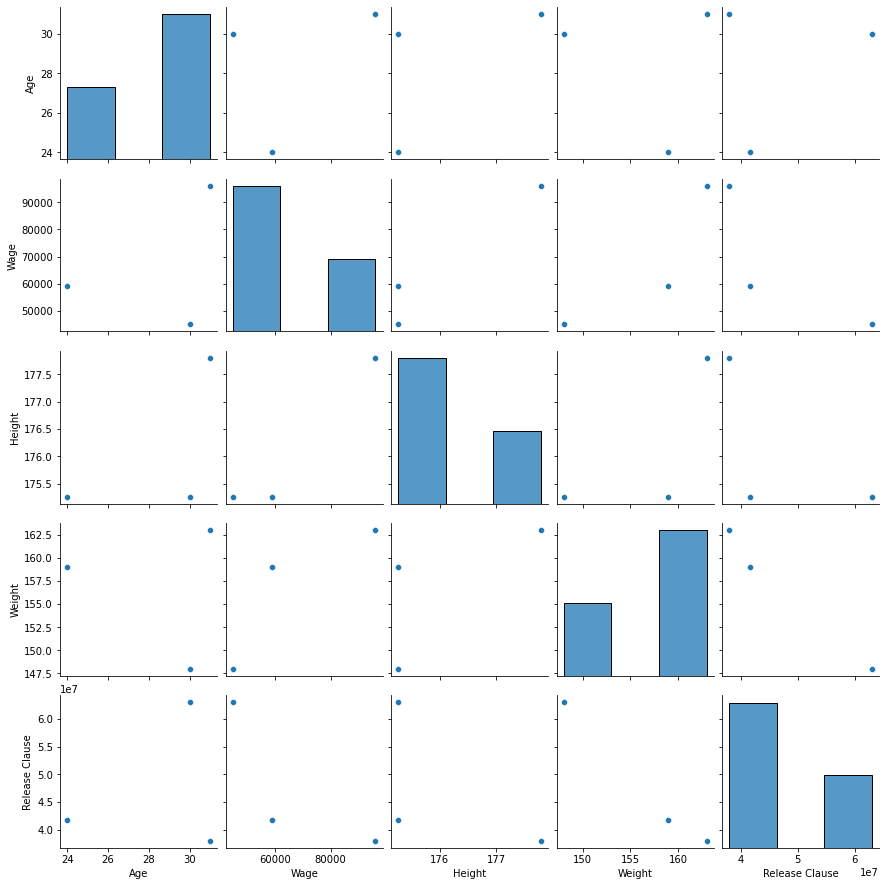

In [2]:
%run 1_explore.ipynb

### 1

Select features that have a minimum correlation with 'Value'

In [234]:
min_corr = 0.05

def select_features(my_features, min_corr):
    my_features_sel = df[my_features + ['Value']].corr()['Value']
    my_features_sel = my_features_sel.loc[my_features_sel > min_corr]
    my_features_sel = list(my_features_sel.index)
    my_features_sel.remove('Value')
    return my_features_sel

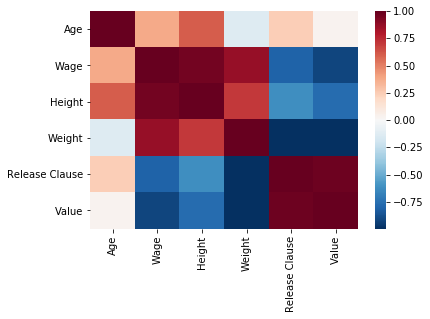

In [235]:
sns.heatmap(df[num_features + ['Value']].corr(), cmap='RdBu_r', center=0.0)

In [236]:
df[num_features + ['Value']].corr()

,Age,Wage,Height,Weight,Release Clause,Value
Age,1.000000,0.377572,0.609994,-0.130354,0.250894,0.039039
Wage,0.377572,1.000000,0.964069,0.868861,-0.801632,-0.910534
Height,0.609994,0.964069,1.000000,0.706129,-0.614016,-0.767988
Weight,-0.130354,0.868861,0.706129,1.000000,-0.992460,-0.995801
Release Clause,0.250894,-0.801632,-0.614016,-0.992460,1.000000,0.977071
Value,0.039039,-0.910534,-0.767988,-0.995801,0.977071,1.000000


In [237]:
num_features_sel = select_features(num_features, min_corr)
num_features_sel

['Release Clause']

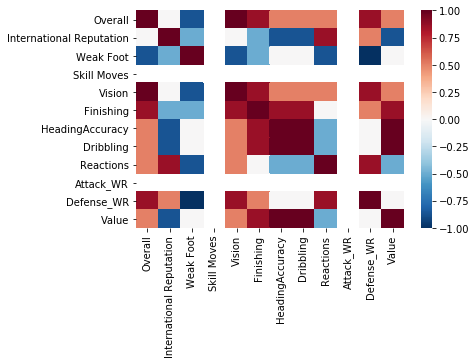

In [238]:
sns.heatmap(df[ord_features + ['Value']].corr(method='spearman'), cmap='RdBu_r', center=0.0)

In [239]:
df[ord_features + ['Value']].corr(method='spearman')

,Overall,International Reputation,Weak Foot,Skill Moves,Vision,Finishing,HeadingAccuracy,Dribbling,Reactions,Attack_WR,Defense_WR,Value
Overall,1.000000,0.000000,-0.866025,NaN,1.000000,0.866025,0.500000,0.500000,0.500000,NaN,0.866025,0.500000
International Reputation,0.000000,1.000000,-0.500000,NaN,0.000000,-0.500000,-0.866025,-0.866025,0.866025,NaN,0.500000,-0.866025
Weak Foot,-0.866025,-0.500000,1.000000,NaN,-0.866025,-0.500000,0.000000,0.000000,-0.866025,NaN,-1.000000,0.000000
Skill Moves,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vision,1.000000,0.000000,-0.866025,NaN,1.000000,0.866025,0.500000,0.500000,0.500000,NaN,0.866025,0.500000
Finishing,0.866025,-0.500000,-0.500000,NaN,0.866025,1.000000,0.866025,0.866025,0.000000,NaN,0.500000,0.866025
HeadingAccuracy,0.500000,-0.866025,0.000000,NaN,0.500000,0.866025,1.000000,1.000000,-0.500000,NaN,0.000000,1.000000
Dribbling,0.500000,-0.866025,0.000000,NaN,0.500000,0.866025,1.000000,1.000000,-0.500000,NaN,0.000000,1.000000
Reactions,0.500000,0.866025,-0.866025,NaN,0.500000,0.000000,-0.500000,-0.500000,1.000000,NaN,0.866025,-0.500000
Attack_WR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [240]:
ord_features_sel = select_features(ord_features, min_corr)

In [241]:
#sns.heatmap(df[ohe_features + ['Value']].corr(), cmap='RdBu_r', center=0.0)

In [242]:
#df[ohe_features + ['Value']].corr()
#---> Makes little sense to plot and use normal correlation of OHE features

In [243]:
test = df['Value']

#Train models with num_features (selected)
#train = df[num_features_sel]

#Train models with num_features (selected) + ord_features (selected)
#train = df[num_features_sel + ord_features_sel]

#Train models with num_features (selected) + ord_features (selected) + ohe_features 
#(skip_position = True/False)
#train = df[num_features_sel + ord_features_sel + ohe_features]

#Train models with num_features (selected) + ord_features (selected) + h_features
train = df[num_features_sel + ord_features_sel + h_features]

#Train models with num_features (selected) + ord_features (selected) + cat_features (target encoded)
#train = df[num_features_sel + ord_features_sel + cat_features]

### 2

In [244]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.2, random_state=1)

Perform target encoding of cat_features:

In [245]:
smoothing = 1 #Default
#smoothing = 5

if target_encoding:
    target_encoder = ce.TargetEncoder(cols = cat_features, smoothing = smoothing).fit(X_train, y_train)
    X_train = target_encoder.transform(X_train)
    X_test = target_encoder.transform(X_test)

In [247]:
#Linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression(normalize = True)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(np.round(np.sqrt(mean_squared_error(y_test, y_pred)), decimals=0))

lr.coef_

5508953.0


array([ 9.45945946e-02, -3.50000000e+05, -5.00000000e+04,  0.00000000e+00,
        4.37500000e+04,  1.75000000e+05, -3.50000000e+05, -5.00000000e+04,
       -3.50000000e+05,  1.00000000e-01, -9.45945946e+00])

1053226.0 num_features<br>
1014194.0 num_features + ord_features<br> 
1013159.0 num_features + ord_features + ohe_features (skip_position = True)<br>
1018995.0 num_features + ord_features + ohe_features (skip_position = False)<br>
1012253.0 num_features + ord_features + h_features (n_components = 9)<br>
1013406.0 num_features + ord_features + h_features (n_components = 4)<br>
1012061.0 num_features + ord_features + cat_features (target encoded)<br>

In [248]:
from sklearn.ensemble import RandomForestRegressor

#rf = RandomForestRegressor(random_state=1, n_estimators = 500, max_features = 'sqrt')
rf = RandomForestRegressor(random_state = 1, n_estimators = 300, max_features = 'auto')

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(np.round(np.sqrt(mean_squared_error(y_test, y_pred)), decimals=0))
print(np.round(mean_absolute_error(y_test, y_pred), decimals=0))

8261667.0
8261667.0


864292.0 num_features (n_estimators = 30, max_features = 'auto')<br>
408470.0 num_features + ord_features (n_estimators = 250, max_features = 'auto')<br>
408306.0 num_features + ord_features + ohe_features (skip_position = True) (n_estimators = 300, max_features = 'auto')<br> 
412214.0 num_features + ord_features + ohe_features (skip_position = False) (n_estimators = 300, max_features = 'auto')<br>
407905.0 num_features + ord_features + h_features (n_components = 9) (n_estimators = 250, max_features = 'auto')<br>
406364.0 num_features + ord_features + h_features (n_components = 4) (n_estimators = 300, max_features = 'auto')<br>
412978.0 num_features + ord_features + cat_features (target encoded) (n_estimators = 350, max_features = 'auto')<br>

In [128]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state = 1, max_depth = 5)

gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

print(np.round(np.sqrt(mean_squared_error(y_test, y_pred)), decimals=0))

416749.0


898445.0 num_features (max_depth = 3)<br>
442307.0 num_features + ord_features (max_depth = 4)<br>
421411.0 num_features + ord_features + ohe_features (skip_position = True) (max_depth = 6)<br>
424394.0 num_features + ord_features + ohe_features (skip_position = False) (max_depth = 6)<br>
429474.0 num_features + ord_features + h_features (n_components = 9) (max_depth = 6)<br>
430130.0 num_features + ord_features + h_features (n_components = 4) (max_depth = 6)<br>
415349.0 num_features + ord_features + cat_features (target encoded) (max_depth = 5)<br>

In [129]:
import xgboost as xgb

dtrain = xgb.DMatrix(data = X_train.values, label = y_train)

params = {'objective': 'reg:linear', 'max_depth': 7, 'silent': 1}
#params = {'objective': 'reg:squarederror', 'max_depth': 7, 'silent': 1} #Makes no difference, I think.

xg_depth_2=xgb.train(params = params, dtrain = dtrain)

dtest = xgb.DMatrix(data = X_test.values)

y_pred=xg_depth_2.predict(dtest)

print(np.round(np.sqrt(mean_squared_error(y_test, y_pred)), decimals=0))

487596.0


859454.0 num_features ('max_depth': 7)<br>
472127.0 num_features + ord_features<br>
485145.0 num_features + ord_features + ohe_features (skip_position = True) ('max_depth': 7)<br>
493157.0 num_features + ord_features + ohe_features (skip_position = False) ('max_depth': 7)<br>
483378.0 num_features + ord_features + h_features (n_components = 9) ('max_depth': 7)<br>
470061.0 num_features + ord_features + h_features (n_components = 4) ('max_depth': 7)<br>
487596.0 num_features + ord_features + cat_features (target encoded) ('max_depth': 7)<br>

In [130]:
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor(n_neighbors = 5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(np.round(np.sqrt(mean_squared_error(y_test, y_pred)), decimals=0))

1126068.0


728107.0 num_features (n_neighbors = 7)<br>
728367.0 num_features + ord_features (n_neighbors = 6)<br>
728367.0 num_features + ord_features + ohe_features (skip_position = True) (n_neighbors = 6)<br>
728367.0 num_features + ord_features + ohe_features (skip_position = False) (n_neighbors = 6)<br>
728412.0 num_features + ord_features + h_features (n_components = 9) (n_neighbors = 6)<br>
728358.0 num_features + ord_features + h_features (n_components = 4) (n_neighbors = 6)<br>
1064886.0 num_features + ord_features + cat_features (n_neighbors = 6)<br>

In [131]:
from sklearn.svm import SVR

svr = SVR(kernel = 'rbf', gamma = 'auto') #'linear' takes too much time, 'poly' only predicts NaNs

svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

print(np.round(np.sqrt(mean_squared_error(y_test, y_pred)), decimals=0))

5062147.0


5062147.0 num_features<br>
5062147.0 num_features + ord_features<br>
5062147.0 num_features + ord_features + ohe_features (skip_position = True)<br>
5062147.0 num_features + ord_features + ohe_features (skip_position = False)<br>
5062147.0 num_features + ord_features + h_features (n_components = 9)<br>
5062147.0 num_features + ord_features + h_features (n_components = 4)<br>
5062147.0 num_features + ord_features + cat_features<br>

### 3

The performance of linear models (linear regression) is quite poor compared to models that can take into account non-linearities (e.g. tree based models).
The best performing models are RandomForestRegressor, GradientBoostingRegressor and XGBoost.
KNeighborsRegressor is initially the best model, when only numerical features are used, but as ordinal features are added it is surpassed.

Generally, as the ordinal features are added, the performance is greatly improved, and when the OHE features are added there is a slight improvement.

Among the OHE features, the feature 'Position' is somewhat problematic. 
Its cardinality is quite high (26), and thus increases significantly the dimensionality.


### 4 

The best model is the RandomForestRegressor(n_estimators = 300) with num_features + ord_features + h_features (n_components = 4).

It has a RMSE of 406364.0 and a MAE of 207422.0

In [1]:
 format(406364.0, 'E')

'4.063640E+05'

In [186]:
print("Mean of 'Value':", np.round(np.mean(df.Value)))
print("Median of 'Value':", np.round(np.median(df.Value)))

Mean of 'Value': 2403422.0
Median of 'Value': 675000.0


Compared to the mean of the target the RMSE is quite adequate. 
If we consider the RMSE, on the other hand, the score is even better.
This makes sense since in comparison with the MSE, the RMSE punishes less severly outliers.
If we instead consider the median of the target, we see that the model performs worse.
This seems reasonable since it is difficult to obtain a model that is accurate both for the mode of the distribution and its outliers.

## Update

Only three players available who are strikers and valued between 20M and 30M.
How can we get an analysis more accurate on these players?